In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

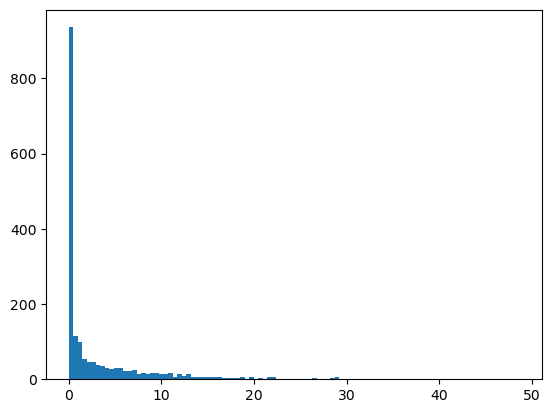

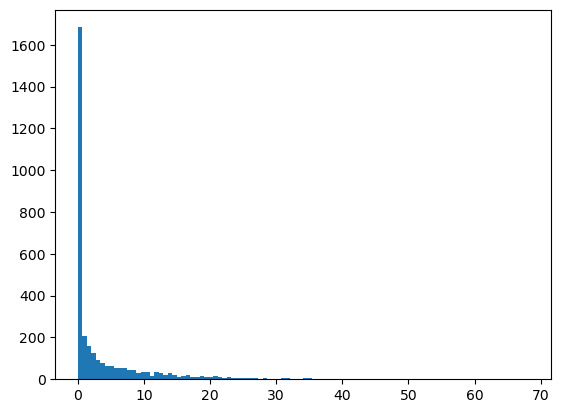

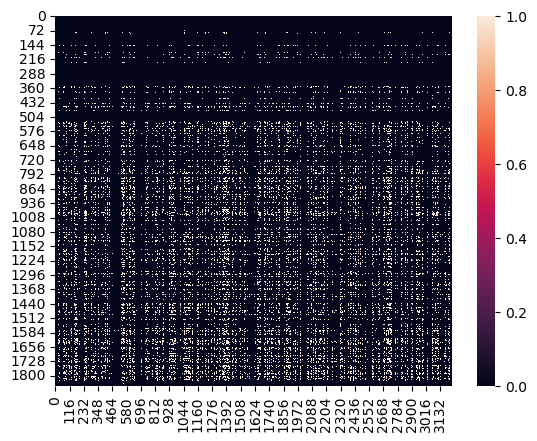

In [6]:
from inv_ticker_network import MatrixFactorization
# Create a new instance of the model
model = MatrixFactorization(1851,3227,1,20)

# Load the saved state dictionary into the model
model.load_state_dict(torch.load('model.pth'))
model.investor_factors.weight
#calculate the first norm of each row
np.mean(model.investor_factors.weight.norm(p=1,dim=1).detach().numpy())
#np.max(model.ticker_date_factors.weight.norm(p=1,dim=1).detach().numpy())
import matplotlib.pyplot as plt
plt.hist(model.investor_factors.weight.norm(p=1,dim=1).detach().numpy(),bins=100)
plt.show()
plt.hist(model.ticker_date_factors.weight.norm(p=1,dim=1).detach().numpy(),bins=100)
plt.show()
#create a matrix of dot products between every pair of investor/tickers
investor_ticker_dot_product=torch.mm(model.investor_factors.weight,model.ticker_date_factors.weight.transpose(0,1))
#for inv_factor in model.investor_factors.weight:
#    print(inv
investor_ticker_dot_product.shape
#create a heatmap graph of the dot products
import seaborn as sns
sns.heatmap(investor_ticker_dot_product.detach().numpy()>0.15)
plt.show()


